In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [231]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [209]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('salary_train.csv', index_col=0)

In [13]:
encoder_label = LabelEncoder().fit(df.job)
df['job_le'] = encoder_label.transform(df.job)
df

,algebra,programming,data science,robotics,economics,job,salary,job_le
Id,,,,,,,,
0,87,62,86,61,90,junior developer,140000,3
1,76,84,76,80,79,data scientist,780000,0
2,56,55,99,82,98,developer,210000,1
3,99,66,65,84,58,economist,420000,2
4,73,87,56,84,73,data scientist,760000,0
...,...,...,...,...,...,...,...,...
8995,58,85,68,62,97,senior developer,590000,5
8996,92,58,99,77,81,robotics engineer,1050000,4
8997,92,54,81,63,74,developer,300000,1


In [118]:
df.sort_values(by = 'salary', inplace = True)
# df.drop(columns=['job'], inplace=True)

# train_data = data[['job_l', 'algebra', 'programming', 'data science', 'robotics', 'economics']]
# train_targets = data[['salary']]
# 
# X_train, X_val, y_train, y_val = train_test_split(train_data, train_targets, test_size=0.3, random_state=20)
# 
# X_train = X_train.to_numpy()
# X_val = X_val.to_numpy()
# y_train = y_train.to_numpy()
# y_val = y_val.to_numpy()

In [14]:
encoder_label.inverse_transform([0, 1, 2, 3, 4])

array(['data scientist', 'developer', 'economist', 'junior developer',
       'robotics engineer'], dtype=object)

In [45]:
ind = 0
for i in encoder_label.classes_:
    print(ind, i)
    ind += 1

0 data scientist
1 developer
2 economist
3 junior developer
4 robotics engineer
5 senior developer


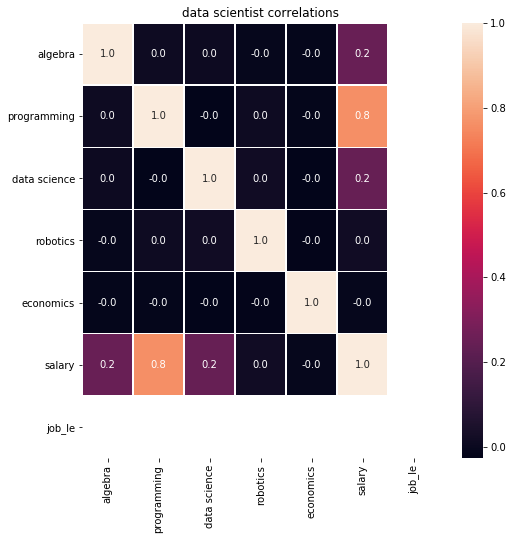

In [54]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[df['job_le'] == 0].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('data scientist correlations');

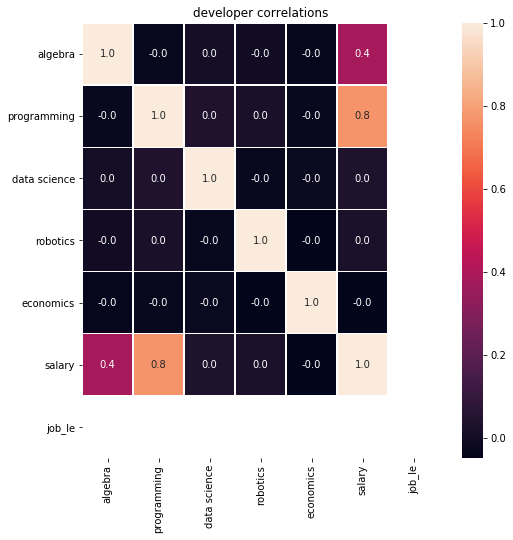

In [58]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[df['job_le'] == 1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('developer correlations');

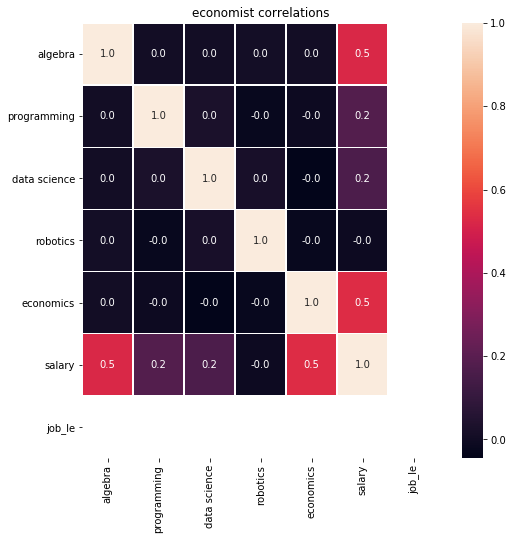

In [60]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[df['job_le'] == 2].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('economist correlations');

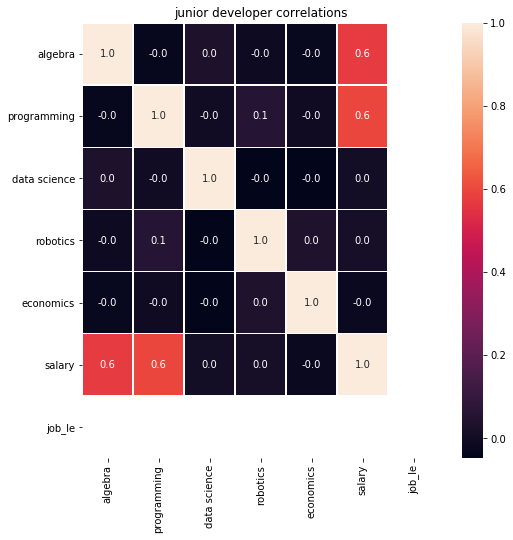

In [63]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[df['job_le'] == 3].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('junior developer correlations');

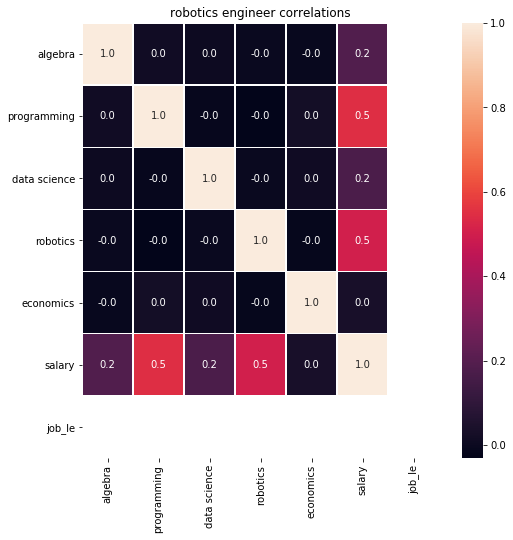

In [64]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[df['job_le'] == 4].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('robotics engineer correlations');

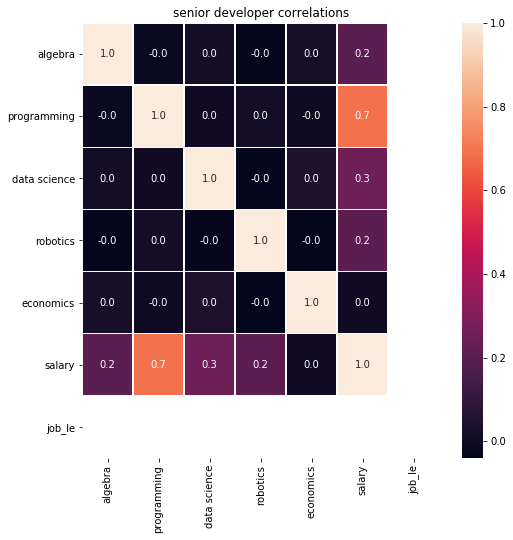

In [65]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[df['job_le'] == 5].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('senior developer correlations');

In [ ]:
plt.figure(figsize=(30, 3))
plt.plot(range(len(df[df['job_le'] == job].sort_values(by='economics')['salary'])), data[data['job_l'] == job].sort_values(by='economics')['salary']);

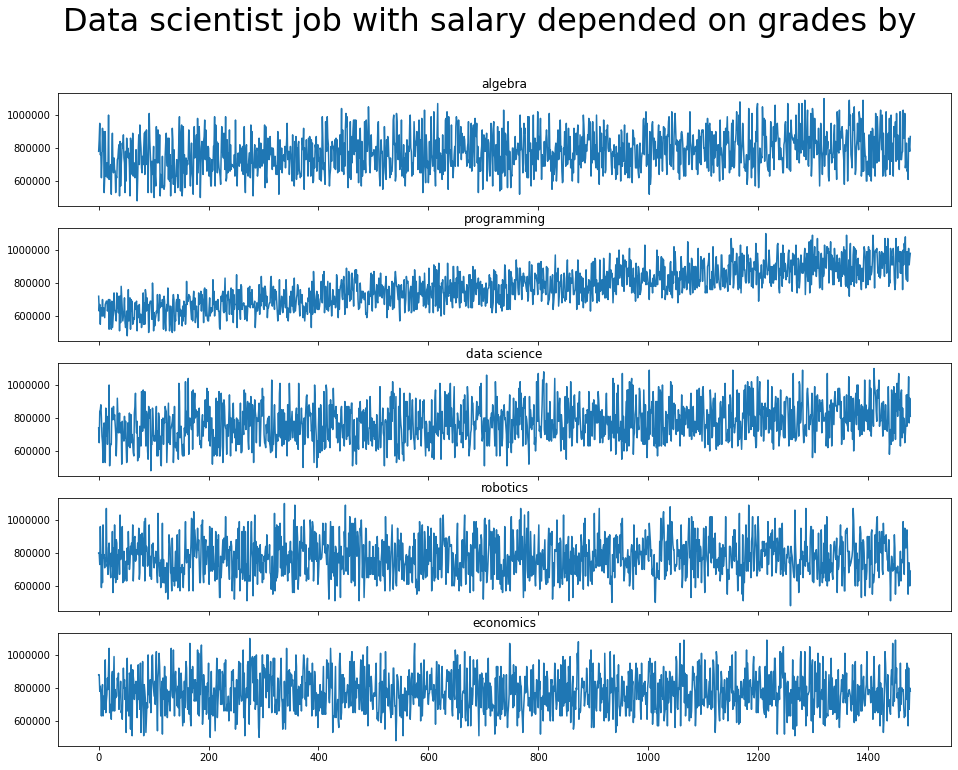

In [104]:
x1 = range(len(df[df['job_le'] == 0].sort_values(by='algebra')['salary']))
y1 = df[df['job_le'] == 0].sort_values(by='algebra')['salary']

x2 = range(len(df[df['job_le'] == 0].sort_values(by='programming')['salary']))
y2 = df[df['job_le'] == 0].sort_values(by='programming')['salary']

x3 = range(len(df[df['job_le'] == 0].sort_values(by='data science')['salary']))
y3 = df[df['job_le'] == 0].sort_values(by='data science')['salary']

x4 = range(len(df[df['job_le'] == 0].sort_values(by='robotics')['salary']))
y4 = df[df['job_le'] == 0].sort_values(by='robotics')['salary']

x5 = range(len(df[df['job_le'] == 0].sort_values(by='economics')['salary']))
y5 = df[df['job_le'] == 0].sort_values(by='economics')['salary']


fig, axs = plt.subplots(5, sharex = True, figsize = (16, 12))
fig.suptitle('Data scientist job with salary depended on grades by', fontsize = 32)
axs[0].plot(x1, y1)
axs[0].set_title('algebra')

axs[1].plot(x2, y2)
axs[1].set_title('programming')

axs[2].plot(x3, y3)
axs[2].set_title('data science')

axs[3].plot(x4, y4)
axs[3].set_title('robotics')

axs[4].plot(x5, y5)
axs[4].set_title('economics');

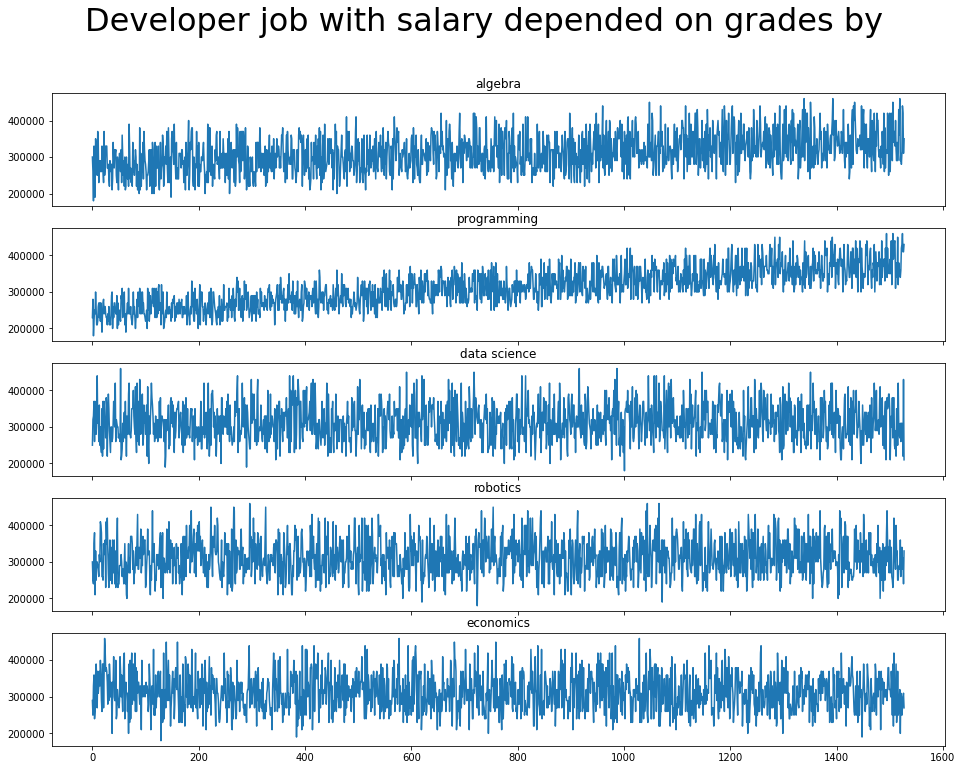

In [105]:
x1 = range(len(df[df['job_le'] == 1].sort_values(by='algebra')['salary']))
y1 = df[df['job_le'] == 1].sort_values(by='algebra')['salary']

x2 = range(len(df[df['job_le'] == 1].sort_values(by='programming')['salary']))
y2 = df[df['job_le'] == 1].sort_values(by='programming')['salary']

x3 = range(len(df[df['job_le'] == 1].sort_values(by='data science')['salary']))
y3 = df[df['job_le'] == 1].sort_values(by='data science')['salary']

x4 = range(len(df[df['job_le'] == 1].sort_values(by='robotics')['salary']))
y4 = df[df['job_le'] == 1].sort_values(by='robotics')['salary']

x5 = range(len(df[df['job_le'] == 1].sort_values(by='economics')['salary']))
y5 = df[df['job_le'] == 1].sort_values(by='economics')['salary']


fig, axs = plt.subplots(5, sharex = True, figsize = (16, 12))
fig.suptitle('Developer job with salary depended on grades by', fontsize = 32)
axs[0].plot(x1, y1)
axs[0].set_title('algebra')

axs[1].plot(x2, y2)
axs[1].set_title('programming')

axs[2].plot(x3, y3)
axs[2].set_title('data science')

axs[3].plot(x4, y4)
axs[3].set_title('robotics')

axs[4].plot(x5, y5)
axs[4].set_title('economics');

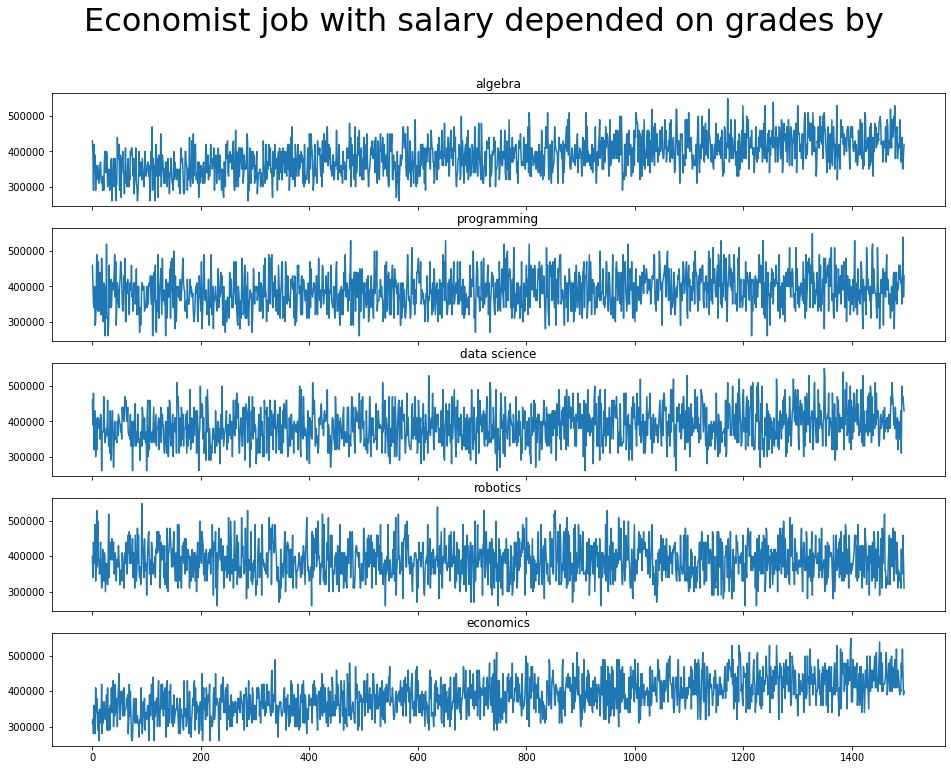

In [106]:
x1 = range(len(df[df['job_le'] == 2].sort_values(by='algebra')['salary']))
y1 = df[df['job_le'] == 2].sort_values(by='algebra')['salary']

x2 = range(len(df[df['job_le'] == 2].sort_values(by='programming')['salary']))
y2 = df[df['job_le'] == 2].sort_values(by='programming')['salary']

x3 = range(len(df[df['job_le'] == 2].sort_values(by='data science')['salary']))
y3 = df[df['job_le'] == 2].sort_values(by='data science')['salary']

x4 = range(len(df[df['job_le'] == 2].sort_values(by='robotics')['salary']))
y4 = df[df['job_le'] == 2].sort_values(by='robotics')['salary']

x5 = range(len(df[df['job_le'] == 2].sort_values(by='economics')['salary']))
y5 = df[df['job_le'] == 2].sort_values(by='economics')['salary']


fig, axs = plt.subplots(5, sharex = True, figsize = (16, 12))
fig.suptitle('Economist job with salary depended on grades by', fontsize = 32)
axs[0].plot(x1, y1)
axs[0].set_title('algebra')

axs[1].plot(x2, y2)
axs[1].set_title('programming')

axs[2].plot(x3, y3)
axs[2].set_title('data science')

axs[3].plot(x4, y4)
axs[3].set_title('robotics')

axs[4].plot(x5, y5)
axs[4].set_title('economics');

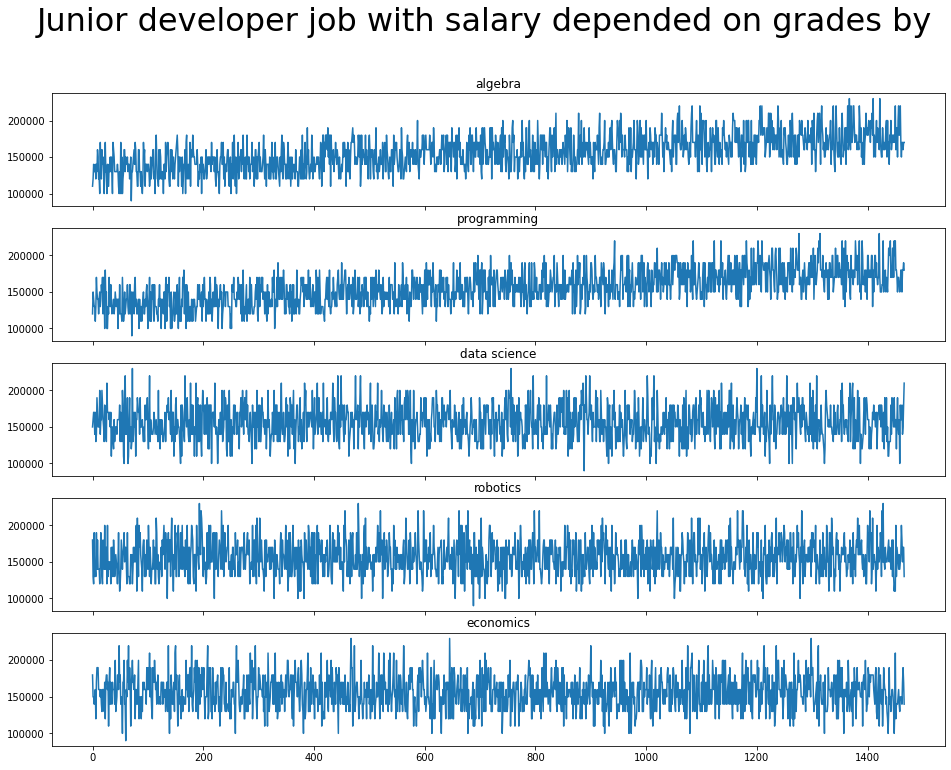

In [107]:
x1 = range(len(df[df['job_le'] == 3].sort_values(by='algebra')['salary']))
y1 = df[df['job_le'] == 3].sort_values(by='algebra')['salary']

x2 = range(len(df[df['job_le'] == 3].sort_values(by='programming')['salary']))
y2 = df[df['job_le'] == 3].sort_values(by='programming')['salary']

x3 = range(len(df[df['job_le'] == 3].sort_values(by='data science')['salary']))
y3 = df[df['job_le'] == 3].sort_values(by='data science')['salary']

x4 = range(len(df[df['job_le'] == 3].sort_values(by='robotics')['salary']))
y4 = df[df['job_le'] == 3].sort_values(by='robotics')['salary']

x5 = range(len(df[df['job_le'] == 3].sort_values(by='economics')['salary']))
y5 = df[df['job_le'] == 3].sort_values(by='economics')['salary']


fig, axs = plt.subplots(5, sharex = True, figsize = (16, 12))
fig.suptitle('Junior developer job with salary depended on grades by', fontsize = 32)
axs[0].plot(x1, y1)
axs[0].set_title('algebra')

axs[1].plot(x2, y2)
axs[1].set_title('programming')

axs[2].plot(x3, y3)
axs[2].set_title('data science')

axs[3].plot(x4, y4)
axs[3].set_title('robotics')

axs[4].plot(x5, y5)
axs[4].set_title('economics');

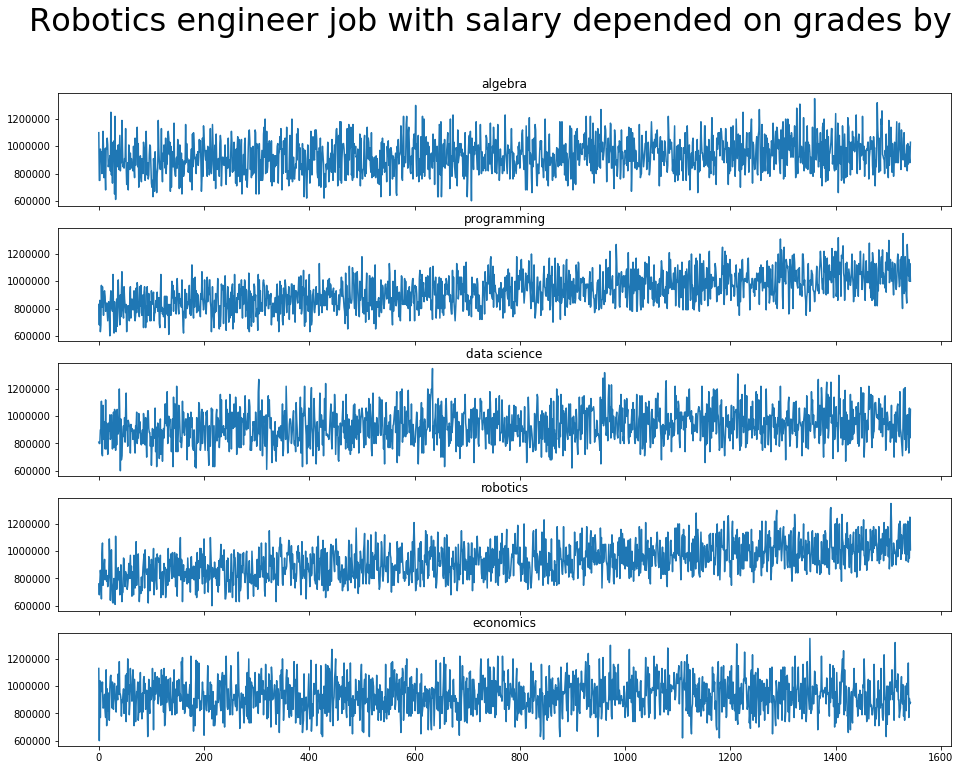

In [108]:
x1 = range(len(df[df['job_le'] == 4].sort_values(by='algebra')['salary']))
y1 = df[df['job_le'] == 4].sort_values(by='algebra')['salary']

x2 = range(len(df[df['job_le'] == 4].sort_values(by='programming')['salary']))
y2 = df[df['job_le'] == 4].sort_values(by='programming')['salary']

x3 = range(len(df[df['job_le'] == 4].sort_values(by='data science')['salary']))
y3 = df[df['job_le'] == 4].sort_values(by='data science')['salary']

x4 = range(len(df[df['job_le'] == 4].sort_values(by='robotics')['salary']))
y4 = df[df['job_le'] == 4].sort_values(by='robotics')['salary']

x5 = range(len(df[df['job_le'] == 4].sort_values(by='economics')['salary']))
y5 = df[df['job_le'] == 4].sort_values(by='economics')['salary']


fig, axs = plt.subplots(5, sharex = True, figsize = (16, 12))
fig.suptitle('Robotics engineer job with salary depended on grades by', fontsize = 32)
axs[0].plot(x1, y1)
axs[0].set_title('algebra')

axs[1].plot(x2, y2)
axs[1].set_title('programming')

axs[2].plot(x3, y3)
axs[2].set_title('data science')

axs[3].plot(x4, y4)
axs[3].set_title('robotics')

axs[4].plot(x5, y5)
axs[4].set_title('economics');

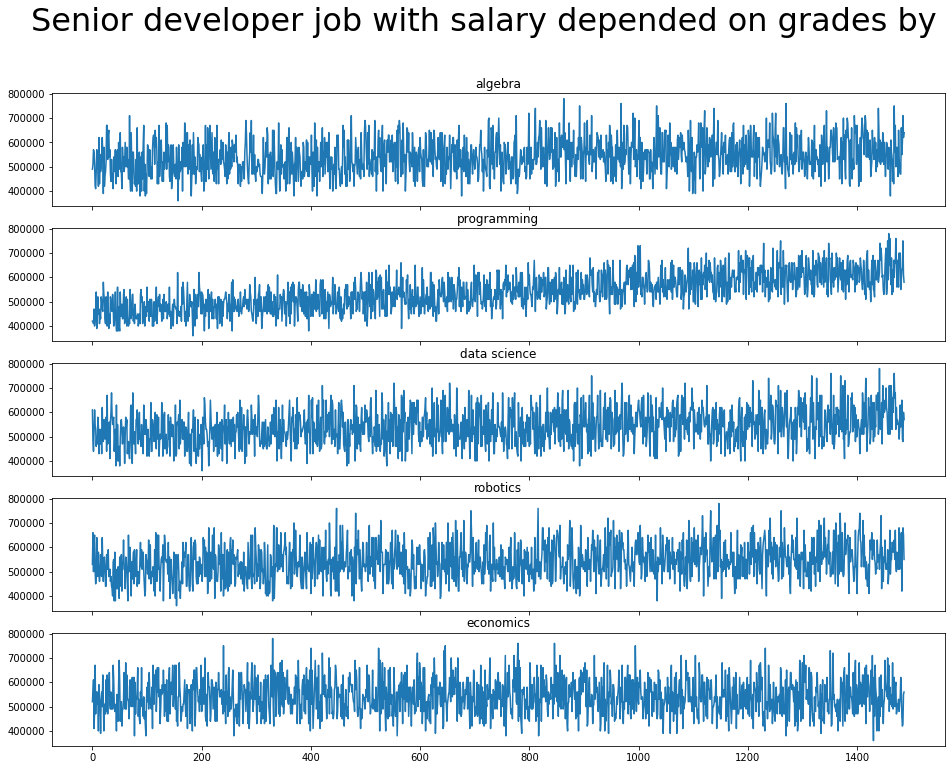

In [109]:
x1 = range(len(df[df['job_le'] == 5].sort_values(by='algebra')['salary']))
y1 = df[df['job_le'] == 5].sort_values(by='algebra')['salary']

x2 = range(len(df[df['job_le'] == 5].sort_values(by='programming')['salary']))
y2 = df[df['job_le'] == 5].sort_values(by='programming')['salary']

x3 = range(len(df[df['job_le'] == 5].sort_values(by='data science')['salary']))
y3 = df[df['job_le'] == 5].sort_values(by='data science')['salary']

x4 = range(len(df[df['job_le'] == 5].sort_values(by='robotics')['salary']))
y4 = df[df['job_le'] == 5].sort_values(by='robotics')['salary']

x5 = range(len(df[df['job_le'] == 5].sort_values(by='economics')['salary']))
y5 = df[df['job_le'] == 5].sort_values(by='economics')['salary']


fig, axs = plt.subplots(5, sharex = True, figsize = (16, 12))
fig.suptitle('Senior developer job with salary depended on grades by', fontsize = 32)
axs[0].plot(x1, y1)
axs[0].set_title('algebra')

axs[1].plot(x2, y2)
axs[1].set_title('programming')

axs[2].plot(x3, y3)
axs[2].set_title('data science')

axs[3].plot(x4, y4)
axs[3].set_title('robotics')

axs[4].plot(x5, y5)
axs[4].set_title('economics');

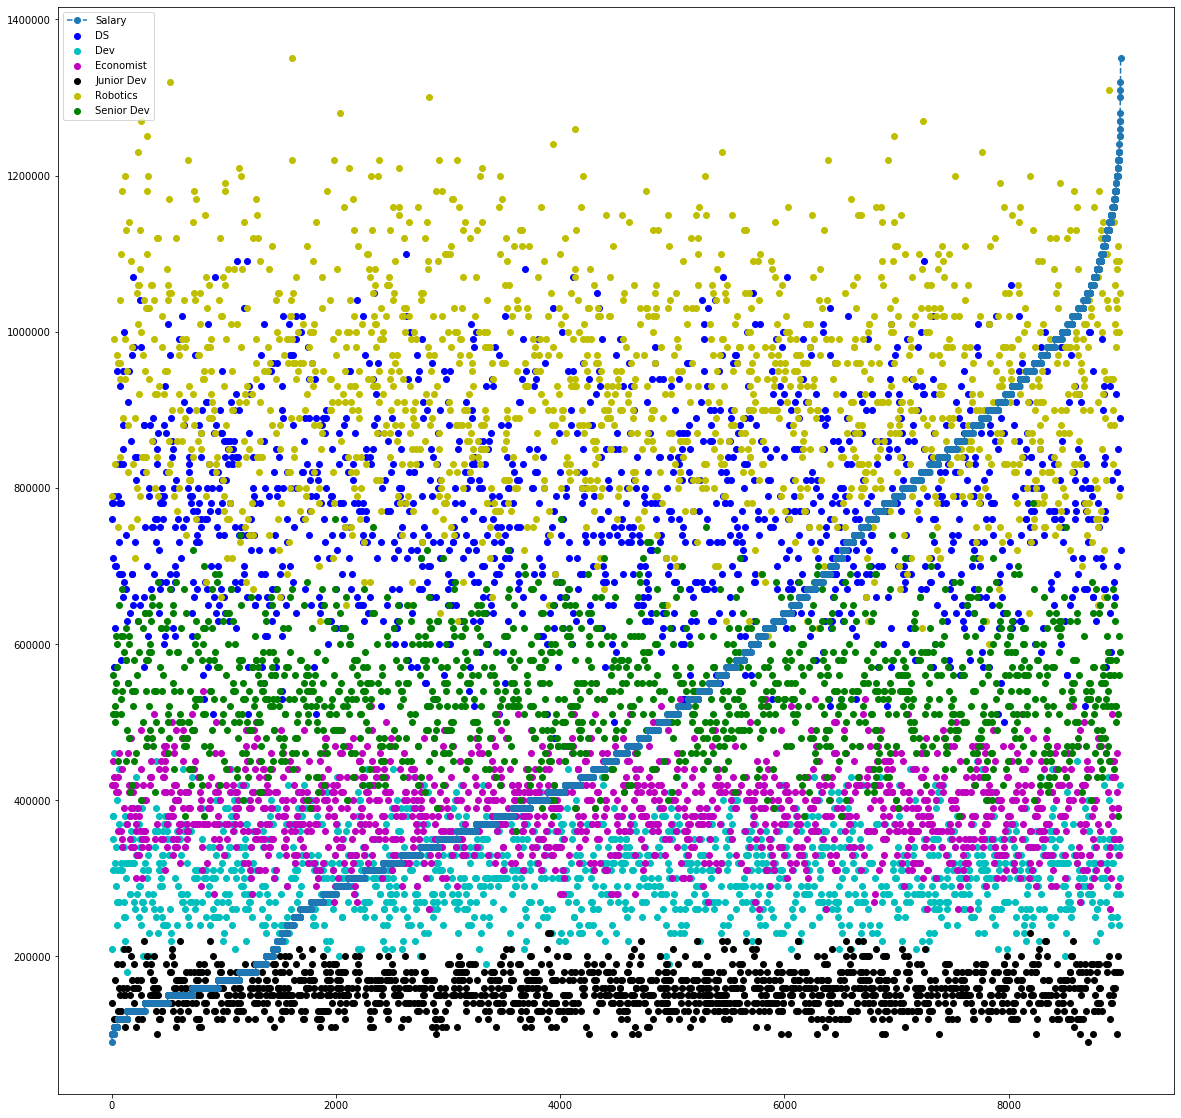

In [129]:
plt.figure(figsize=(20, 20))
plt.scatter(df[df['job_le'] == 0].index.to_list(), df['salary'][df[df['job_le'] == 0].index.to_list()], c='b', label='DS')
plt.scatter(df[df['job_le'] == 1].index.to_list(), df['salary'][df[df['job_le'] == 1].index.to_list()], c='c', label='Dev')
plt.scatter(df[df['job_le'] == 2].index.to_list(), df['salary'][df[df['job_le'] == 2].index.to_list()], c='m', label='Economist')
plt.scatter(df[df['job_le'] == 3].index.to_list(), df['salary'][df[df['job_le'] == 3].index.to_list()], c='k', label='Junior Dev')
plt.scatter(df[df['job_le'] == 4].index.to_list(), df['salary'][df[df['job_le'] == 4].index.to_list()], c='y', label='Robotics')
plt.scatter(df[df['job_le'] == 5].index.to_list(), df['salary'][df[df['job_le'] == 5].index.to_list()], c='g', label='Senior Dev')
x_data_plot = df[['job_le', 'algebra', 'programming', 'data science', 'robotics', 'economics']]
y_data_plot = df[['salary']]
plt.plot(range(len(x_data_plot)), y_data_plot, linestyle='dashed', marker='o', label='Salary')
plt.legend();

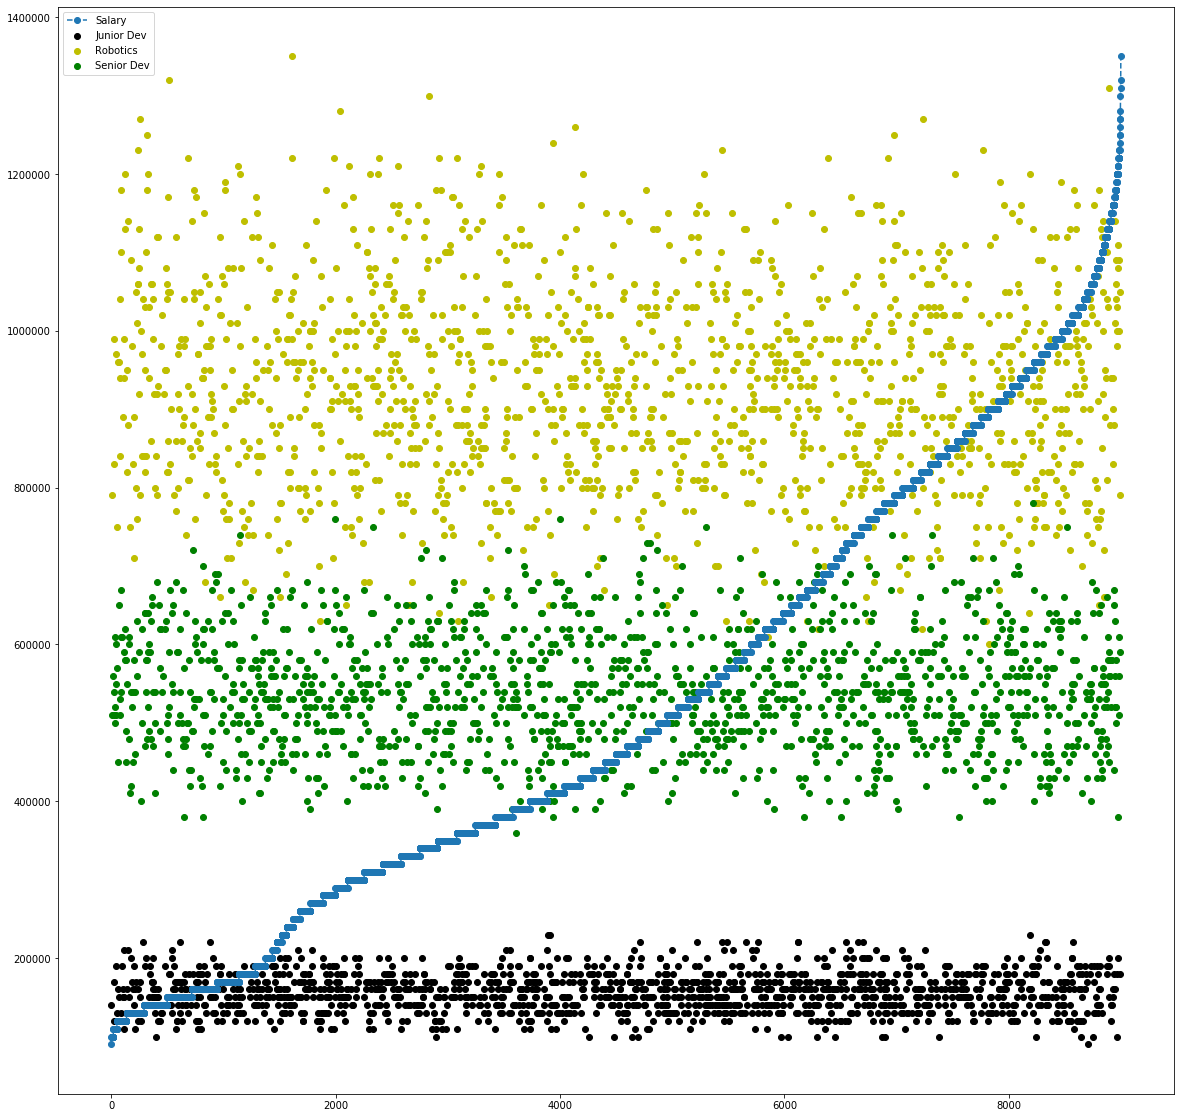

In [132]:
plt.figure(figsize=(20, 20))
#plt.scatter(df[df['job_le'] == 0].index.to_list(), df['salary'][df[df['job_le'] == 0].index.to_list()], c='b', label='DS')
#plt.scatter(df[df['job_le'] == 1].index.to_list(), df['salary'][df[df['job_le'] == 1].index.to_list()], c='c', label='Dev')
#plt.scatter(df[df['job_le'] == 2].index.to_list(), df['salary'][df[df['job_le'] == 2].index.to_list()], c='m', label='Economist')
plt.scatter(df[df['job_le'] == 3].index.to_list(), df['salary'][df[df['job_le'] == 3].index.to_list()], c='k', label='Junior Dev')
plt.scatter(df[df['job_le'] == 4].index.to_list(), df['salary'][df[df['job_le'] == 4].index.to_list()], c='y', label='Robotics')
plt.scatter(df[df['job_le'] == 5].index.to_list(), df['salary'][df[df['job_le'] == 5].index.to_list()], c='g', label='Senior Dev')
x_data_plot = df[['job_le', 'algebra', 'programming', 'data science', 'robotics', 'economics']]
y_data_plot = df[['salary']]
plt.plot(range(len(x_data_plot)), y_data_plot, linestyle='dashed', marker='o', label='Salary')
plt.legend();

In [134]:
relation = {i:[] for i in encoder_label.inverse_transform([0, 1, 2, 3, 4, 5])}

In [137]:
relation['data scientist'] = ['algebra', 'programming', 'data science']
relation['developer'] = ['algebra', 'programming']
relation['economist'] = ['algebra', 'programming', 'data science', 'economics']
relation['junior developer'] = ['algebra', 'programming']
relation['robotics engineer'] = ['algebra', 'programming', 'data science', 'robotics']
relation['senior developer'] = ['algebra', 'programming', 'data science', 'robotics']

In [138]:
df_0 = df[df['job_le'] == 0][['algebra', 'programming', 'data science', 'salary']].copy().to_numpy()
df_1 = df[df['job_le'] == 1][['algebra', 'programming', 'salary']].copy().to_numpy()
df_2 = df[df['job_le'] == 2][['algebra', 'programming', 'data science', 'economics', 'salary']].copy().to_numpy()
df_3 = df[df['job_le'] == 3][['algebra', 'programming', 'salary']].copy().to_numpy()
df_4 = df[df['job_le'] == 4][['algebra', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_5 = df[df['job_le'] == 5][['algebra', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()

In [154]:
train_df_0, target_data_0 = df_0[:, 0:-1], df_0[:, -1].ravel()
train_df_1, target_data_1 = df_1[:, 0:-1], df_1[:, -1].ravel()
train_df_2, target_data_2 = df_2[:, 0:-1], df_2[:, -1].ravel()
train_df_3, target_data_3 = df_3[:, 0:-1], df_3[:, -1].ravel()
train_df_4, target_data_4 = df_4[:, 0:-1], df_4[:, -1].ravel()
train_df_5, target_data_5 = df_5[:, 0:-1], df_5[:, -1].ravel()

In [155]:
linreg_0 = LinearRegression(fit_intercept=True).fit(train_df_0, target_data_0)
linreg_1 = LinearRegression(fit_intercept=True).fit(train_df_1, target_data_1)
linreg_2 = LinearRegression(fit_intercept=True).fit(train_df_2, target_data_2)
linreg_3 = LinearRegression(fit_intercept=True).fit(train_df_3, target_data_3)
linreg_4 = LinearRegression(fit_intercept=True).fit(train_df_4, target_data_4)
linreg_5 = LinearRegression(fit_intercept=True).fit(train_df_5, target_data_5)

In [165]:
print("RMSE's:")
print(mse(linreg_0.predict(train_df_0), target_data_0, squared=False))
print(mse(linreg_1.predict(train_df_1), target_data_1, squared=False))
print(mse(linreg_2.predict(train_df_2), target_data_2, squared=False))
print(mse(linreg_3.predict(train_df_3), target_data_3, squared=False))
print(mse(linreg_4.predict(train_df_4), target_data_4, squared=False))
print(mse(linreg_5.predict(train_df_5), target_data_5, squared=False))

print()

print('Mean RMSE =')
print((mse(linreg_0.predict(train_df_0), target_data_0, squared=False) +
mse(linreg_1.predict(train_df_1), target_data_1, squared=False) +
mse(linreg_2.predict(train_df_2), target_data_2, squared=False) +
mse(linreg_3.predict(train_df_3), target_data_3, squared=False) +
mse(linreg_4.predict(train_df_4), target_data_4, squared=False) +
mse(linreg_5.predict(train_df_5), target_data_5, squared=False))/6)

RMSE's:
65315.62920410556
26112.236317924457
32193.706636825835
13316.595176768184
76995.96644454522
45092.37939178801

Mean RMSE =
43171.08552865955


In [220]:
df_test = pd.read_csv('salary_predict.csv')
df_test['job_le'] = encoder_label.transform(df_test.job)

In [221]:
df_test

,Id,algebra,programming,data science,robotics,economics,job,salary,job_le
0,9000,73,59,57,54,61,robotics engineer,0,4
1,9001,77,80,53,93,80,senior developer,0,5
2,9002,95,72,88,63,84,developer,0,1
3,9003,83,88,97,75,50,robotics engineer,0,4
4,9004,52,85,92,87,62,junior developer,0,3
...,...,...,...,...,...,...,...,...,...
995,9995,83,98,71,83,61,junior developer,0,3
996,9996,98,59,74,79,52,economist,0,2
997,9997,91,68,76,50,92,developer,0,1
998,9998,61,70,95,51,87,junior developer,0,3


In [173]:
df_test_0 = df_test[df_test['job_le'] == 0][['Id', 'algebra', 'programming', 'data science', 'salary']].copy().to_numpy()
df_test_1 = df_test[df_test['job_le'] == 1][['Id', 'algebra', 'programming', 'salary']].copy().to_numpy()
df_test_2 = df_test[df_test['job_le'] == 2][['Id', 'algebra', 'programming', 'data science', 'economics', 'salary']].copy().to_numpy()
df_test_3 = df_test[df_test['job_le'] == 3][['Id', 'algebra', 'programming', 'salary']].copy().to_numpy()
df_test_4 = df_test[df_test['job_le'] == 4][['Id', 'algebra', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_test_5 = df_test[df_test['job_le'] == 5][['Id', 'algebra', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()

In [174]:
s_0 = linreg_0.predict(df_test_0[:, 1:-1]) 
s_1 = linreg_1.predict(df_test_1[:, 1:-1])
s_2 = linreg_2.predict(df_test_2[:, 1:-1])
s_3 = linreg_3.predict(df_test_3[:, 1:-1])
s_4 = linreg_4.predict(df_test_4[:, 1:-1])
s_5 = linreg_5.predict(df_test_5[:, 1:-1])

In [178]:
pred_0 = pd.DataFrame({'Id': (df_test_0[:, 0]), 'salary': (s_0)})
pred_1 = pd.DataFrame({'Id': (df_test_1[:, 0]), 'salary': (s_1)})
pred_2 = pd.DataFrame({'Id': (df_test_2[:, 0]), 'salary': (s_2)})
pred_3 = pd.DataFrame({'Id': (df_test_3[:, 0]), 'salary': (s_3)})
pred_4 = pd.DataFrame({'Id': (df_test_4[:, 0]), 'salary': (s_4)})
pred_5 = pd.DataFrame({'Id': (df_test_5[:, 0]), 'salary': (s_5)})

In [179]:
result_linreg = pd.concat([pred_0, pred_1, pred_2, pred_3, pred_4, pred_5]).sort_values(by='Id').astype(int, copy=True).set_index('Id')

In [183]:
result_linreg.loc[result_linreg.salary > 1000000, "salary"] = 1000000
result_linreg.head()

,salary
Id,
9000,732438
9001,558049
9002,334771
9003,1000000
9004,144108


In [190]:
best_linreg_subm = pd.read_csv('Predictions/vm_subm.csv')
np.any(best_linreg_subm['salary'].values == result_linreg['salary'].values)

True

In [223]:
data_0 = df[df['job_le'] == 0][['algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
data_1 = df[df['job_le'] == 1][['algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
data_2 = df[df['job_le'] == 2][['algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
data_3 = df[df['job_le'] == 3][['algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
data_4 = df[df['job_le'] == 4][['algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
data_5 = df[df['job_le'] == 5][['algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()

In [224]:
lar_0 = Lasso(fit_intercept=True).fit(data_0[:, 0:-1], data_0[:, -1].ravel())
lar_1 = Lasso(fit_intercept=True).fit(data_1[:, 0:-1], data_1[:, -1].ravel())
lar_2 = Lasso(fit_intercept=True).fit(data_2[:, 0:-1], data_2[:, -1].ravel())
lar_3 = Lasso(fit_intercept=True).fit(data_3[:, 0:-1], data_3[:, -1].ravel())
lar_4 = Lasso(fit_intercept=True).fit(data_4[:, 0:-1], data_4[:, -1].ravel())
lar_5 = Lasso(fit_intercept=True).fit(data_5[:, 0:-1], data_5[:, -1].ravel())

In [225]:
print("RMSE's:")
print(mse(lar_0.predict(data_0[:, 0:-1]), data_0[:, -1], squared=False))
print(mse(lar_1.predict(data_1[:, 0:-1]), data_1[:, -1], squared=False))
print(mse(lar_2.predict(data_2[:, 0:-1]), data_2[:, -1], squared=False))
print(mse(lar_3.predict(data_3[:, 0:-1]), data_3[:, -1], squared=False))
print(mse(lar_4.predict(data_4[:, 0:-1]), data_4[:, -1], squared=False))
print(mse(lar_5.predict(data_5[:, 0:-1]), data_5[:, -1], squared=False))

print()

print('Mean RMSE =')
print((mse(lar_0.predict(data_0[:, 0:-1]), data_0[:, -1], squared=False) +
       mse(lar_1.predict(data_1[:, 0:-1]), data_1[:, -1], squared=False) +
       mse(lar_2.predict(data_2[:, 0:-1]), data_2[:, -1], squared=False) +
       mse(lar_3.predict(data_3[:, 0:-1]), data_3[:, -1], squared=False) +
       mse(lar_4.predict(data_4[:, 0:-1]), data_4[:, -1], squared=False) +
       mse(lar_5.predict(data_5[:, 0:-1]), data_5[:, -1], squared=False))/6)

RMSE's:
65293.103706658694
26094.374585740206
32193.241856638604
13308.810844842832
76904.24266675088
45091.84001145393

Mean RMSE =
43147.60227868085


In [222]:
df_test = pd.read_csv('salary_predict.csv')
df_test['job_le'] = encoder_label.transform(df_test.job)

In [226]:
df_test_lasso_0 = df_test[df_test['job_le'] == 0][['Id', 'algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_test_lasso_1 = df_test[df_test['job_le'] == 1][['Id', 'algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_test_lasso_2 = df_test[df_test['job_le'] == 2][['Id', 'algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_test_lasso_3 = df_test[df_test['job_le'] == 3][['Id', 'algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_test_lasso_4 = df_test[df_test['job_le'] == 4][['Id', 'algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()
df_test_lasso_5 = df_test[df_test['job_le'] == 5][['Id', 'algebra', 'economics', 'programming', 'data science', 'robotics', 'salary']].copy().to_numpy()

In [228]:
s_lar_0 = lar_0.predict(df_test_lasso_0[:, 1:-1]) 
s_lar_1 = lar_1.predict(df_test_lasso_1[:, 1:-1])
s_lar_2 = lar_2.predict(df_test_lasso_2[:, 1:-1])
s_lar_3 = lar_3.predict(df_test_lasso_3[:, 1:-1])
s_lar_4 = lar_4.predict(df_test_lasso_4[:, 1:-1])
s_lar_5 = lar_5.predict(df_test_lasso_5[:, 1:-1])

pred_lar_0 = pd.DataFrame({'Id': (df_test_0[:, 0]), 'salary': (s_lar_0)})
pred_lar_1 = pd.DataFrame({'Id': (df_test_1[:, 0]), 'salary': (s_lar_1)})
pred_lar_2 = pd.DataFrame({'Id': (df_test_2[:, 0]), 'salary': (s_lar_2)})
pred_lar_3 = pd.DataFrame({'Id': (df_test_3[:, 0]), 'salary': (s_lar_3)})
pred_lar_4 = pd.DataFrame({'Id': (df_test_4[:, 0]), 'salary': (s_lar_4)})
pred_lar_5 = pd.DataFrame({'Id': (df_test_5[:, 0]), 'salary': (s_lar_5)})

result_lar = pd.concat([pred_lar_0, pred_lar_1, pred_lar_2, pred_lar_3, pred_lar_4, pred_lar_5]).sort_values(by='Id').astype(int, copy=True).set_index('Id')

result_lar.loc[result_lar.salary > 1000000, "salary"] = 1000000
#result_lar.to_csv('Predictions/xgb_test.csv')

In [230]:
best_lar_subm = pd.read_csv('Predictions/lasso.csv')
np.any(best_lar_subm['salary'].values == result_lar['salary'].values)

True

# Lasso score RMSE 48554.29945 on Kaggle

In [233]:
kr_0 = KernelRidge().fit(data_0[:, 0:-1], data_0[:, -1].ravel())
kr_1 = KernelRidge().fit(data_1[:, 0:-1], data_1[:, -1].ravel())
kr_2 = KernelRidge().fit(data_2[:, 0:-1], data_2[:, -1].ravel())
kr_3 = KernelRidge().fit(data_3[:, 0:-1], data_3[:, -1].ravel())
kr_4 = KernelRidge().fit(data_4[:, 0:-1], data_4[:, -1].ravel())
kr_5 = KernelRidge().fit(data_5[:, 0:-1], data_5[:, -1].ravel())

print(mse(kr_0.predict(data_0[:, 0:-1]), data_0[:, -1], squared=False))
print(mse(kr_1.predict(data_1[:, 0:-1]), data_1[:, -1], squared=False))
print(mse(kr_2.predict(data_2[:, 0:-1]), data_2[:, -1], squared=False))
print(mse(kr_3.predict(data_3[:, 0:-1]), data_3[:, -1], squared=False))
print(mse(kr_4.predict(data_4[:, 0:-1]), data_4[:, -1], squared=False))
print(mse(kr_5.predict(data_5[:, 0:-1]), data_5[:, -1], squared=False))

print('----', (mse(kr_0.predict(data_0[:, 0:-1]), data_0[:, -1], squared=False) + 
 mse(kr_1.predict(data_1[:, 0:-1]), data_1[:, -1], squared=False) + 
 mse(kr_2.predict(data_2[:, 0:-1]), data_2[:, -1], squared=False) +
 mse(kr_3.predict(data_3[:, 0:-1]), data_3[:, -1], squared=False) +
 mse(kr_4.predict(data_4[:, 0:-1]), data_4[:, -1], squared=False) +
 mse(kr_5.predict(data_5[:, 0:-1]), data_5[:, -1], squared=False)) / 6)

s_0 = kr_0.predict(df_test_lasso_0[:, 1:-1]) 
s_1 = kr_1.predict(df_test_lasso_1[:, 1:-1])
s_2 = kr_2.predict(df_test_lasso_2[:, 1:-1])
s_3 = kr_3.predict(df_test_lasso_3[:, 1:-1])
s_4 = kr_4.predict(df_test_lasso_4[:, 1:-1])
s_5 = kr_5.predict(df_test_lasso_5[:, 1:-1])

pred_0 = pd.DataFrame({'Id': (df_test_lasso_0[:, 0]), 'salary': (s_0)})
pred_1 = pd.DataFrame({'Id': (df_test_lasso_1[:, 0]), 'salary': (s_1)})
pred_2 = pd.DataFrame({'Id': (df_test_lasso_2[:, 0]), 'salary': (s_2)})
pred_3 = pd.DataFrame({'Id': (df_test_lasso_3[:, 0]), 'salary': (s_3)})
pred_4 = pd.DataFrame({'Id': (df_test_lasso_4[:, 0]), 'salary': (s_4)})
pred_5 = pd.DataFrame({'Id': (df_test_lasso_5[:, 0]), 'salary': (s_5)})

kaggle = pd.concat([pred_0, pred_1, pred_2, pred_3, pred_4, pred_5]).sort_values(by='Id').astype('int', copy=True).set_index('Id')

kaggle.salary = kaggle.salary.astype('int')
kaggle.loc[kaggle.salary > 1000000, "salary"] = 1000000

kaggle.to_csv('kr_2.csv')

65299.60905888927
26098.456872226812
32198.82862160217
13319.401138794963
76979.11720881285
45112.46411068542
---- 43167.97950183525
